# Tutorial 1 with 200 images per category (To avoid possible errors)

I am just coding the following to be familiarize with one of the approch to classsify land use land cover from satellite EuroSAT: https://www.kaggle.com/nilesh789/land-cover-classification-with-eurosat-dataset

# Reading Dataset

In [1]:
import os
os.chdir(r"C:\Users\said_\Google Drive\THE CITY COLLEGE OF NEW YORK\Ph.D.Classes\Spring21\Neural Networks\Project\Tutorial_1_small_ddataset")
dataset = r'EuroSAT_RGB_Deleting_Some_Images'
labels = os.listdir(dataset)
print(labels)

['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


# Exploratory Data Analysis

## Some Histograms to look at the distribution of the dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

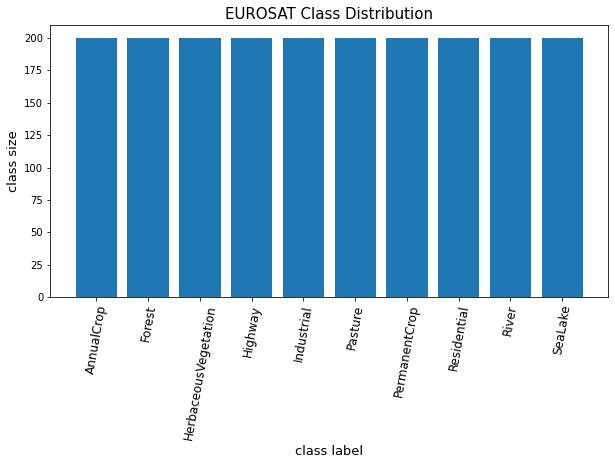

In [3]:
counts = {}

for l in labels:
    counts[l] = len(os.listdir(os.path.join(dataset, l))) # to count numbers of files inside each folder

    
plt.figure(figsize=(10, 5))

plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), list(counts.keys()), fontsize=12, rotation=80)
plt.xlabel('class label', fontsize=13)
plt.ylabel('class size', fontsize=13)
plt.title('EUROSAT Class Distribution', fontsize=15)
plt.show()

There are 10 classes of land use land cover

## Showing some figures

In [4]:
import PIL # pillow - image processing

In [5]:
# Reading figures ended in 1000 and 2000
img_paths = [os.path.join(dataset, l, l + '_1.jpg') for l in labels]
img_paths = img_paths + [os.path.join(dataset, l, l + '_2.jpg') for l in labels]
print(len(img_paths))
img_paths

20


['EuroSAT_RGB_Deleting_Some_Images\\AnnualCrop\\AnnualCrop_1.jpg',
 'EuroSAT_RGB_Deleting_Some_Images\\Forest\\Forest_1.jpg',
 'EuroSAT_RGB_Deleting_Some_Images\\HerbaceousVegetation\\HerbaceousVegetation_1.jpg',
 'EuroSAT_RGB_Deleting_Some_Images\\Highway\\Highway_1.jpg',
 'EuroSAT_RGB_Deleting_Some_Images\\Industrial\\Industrial_1.jpg',
 'EuroSAT_RGB_Deleting_Some_Images\\Pasture\\Pasture_1.jpg',
 'EuroSAT_RGB_Deleting_Some_Images\\PermanentCrop\\PermanentCrop_1.jpg',
 'EuroSAT_RGB_Deleting_Some_Images\\Residential\\Residential_1.jpg',
 'EuroSAT_RGB_Deleting_Some_Images\\River\\River_1.jpg',
 'EuroSAT_RGB_Deleting_Some_Images\\SeaLake\\SeaLake_1.jpg',
 'EuroSAT_RGB_Deleting_Some_Images\\AnnualCrop\\AnnualCrop_2.jpg',
 'EuroSAT_RGB_Deleting_Some_Images\\Forest\\Forest_2.jpg',
 'EuroSAT_RGB_Deleting_Some_Images\\HerbaceousVegetation\\HerbaceousVegetation_2.jpg',
 'EuroSAT_RGB_Deleting_Some_Images\\Highway\\Highway_2.jpg',
 'EuroSAT_RGB_Deleting_Some_Images\\Industrial\\Industrial_2.jpg

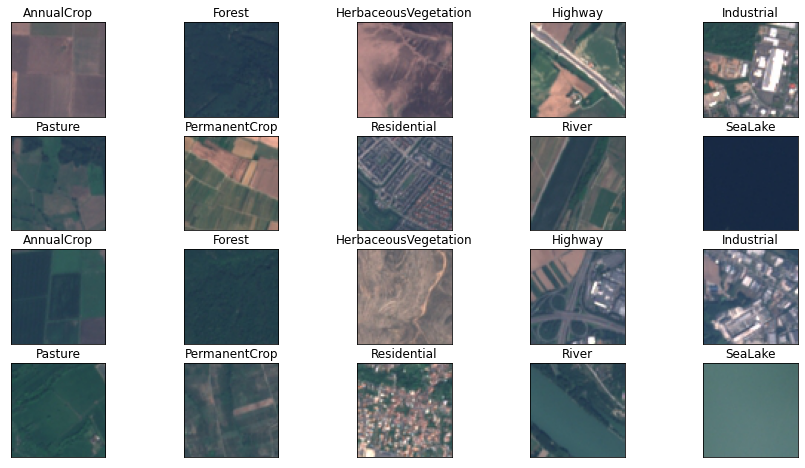

In [6]:
def plot_sat_imgs(paths):
    plt.figure(figsize = (15, 8))
    for i in range(20):
        plt.subplot(4, 5, i+1, xticks = [], yticks = [])
        img = PIL.Image.open(paths[i], 'r')
        plt.imshow(np.asarray(img))
        plt.title(paths[i].split("\\")[-2])
plot_sat_imgs(img_paths)

## Showing the distribution of the RGB for figures ended in 1000

In [7]:
from skimage import io

In [8]:
def plot_img_histogram(img_path):
    image = io.imread(img_path)
    plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    plt.xlabel('Intensity')
    plt.ylabel('Count')
    plt.title(img_path.split('\\')[-2])
    plt.show()

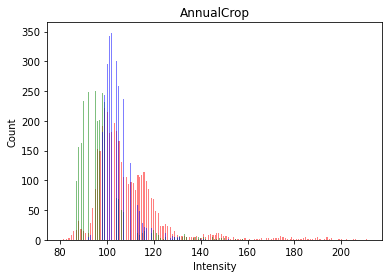

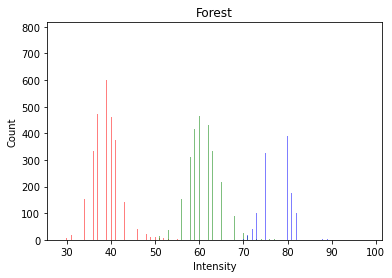

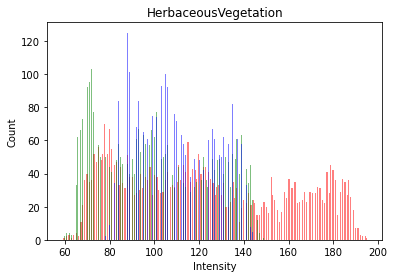

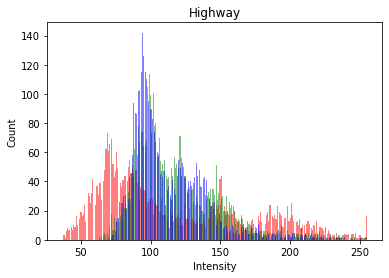

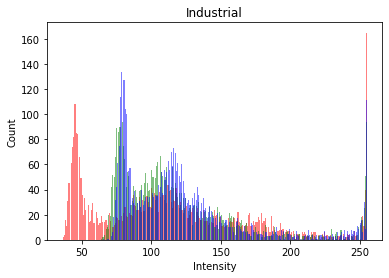

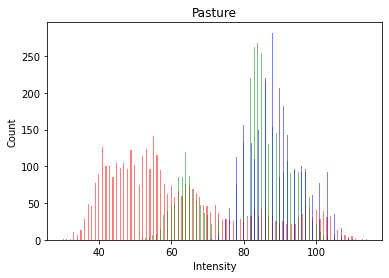

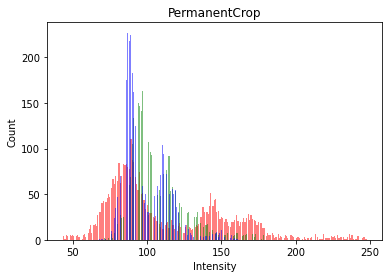

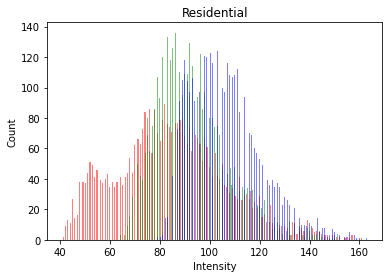

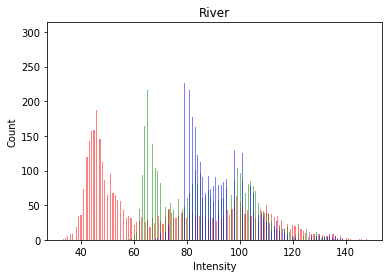

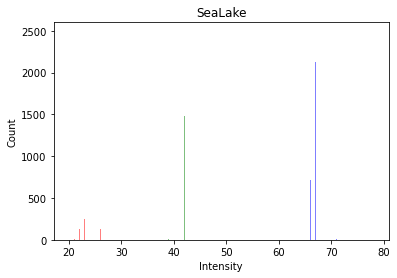

In [9]:
for l in labels:
    path = os.path.join(dataset, l, l+'_1.jpg')
    plot_img_histogram(path)

# Training and Test Dataset

## Spliting Dataset

Splitting the dataset into 80% and 20% respectively, and saving them into 2 different folders (training_dataset,testing_dataset)

In [10]:
import re
from sklearn.model_selection import StratifiedShuffleSplit
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm # library's name: te quiero demasiado
import shutil # support file copying and removal

In [11]:
train_dir = 'training_dataset'
test_dir = 'testing_dataset'
batch_size = 128
num_classes =len(labels)
input_shape = (64, 64, 3)
class_mode = 'categorical'

In [12]:
# create training and testing directories
for path in (train_dir, test_dir):
    if not os.path.exists(path):
        os.mkdir(path)

# create class label subdirectories in train and test
for l in labels:
    
    if not os.path.exists(os.path.join(train_dir, l)):
        os.mkdir(os.path.join(train_dir, l))

    if not os.path.exists(os.path.join(test_dir, l)):
        os.mkdir(os.path.join(test_dir, l))

In [13]:
# map each image path to their class label in 'data'
data = {}

for l in labels:
    for img in os.listdir(dataset+'/'+l):
        data.update({os.path.join(dataset, l, img): l})

X = pd.Series(list(data.keys()))
y = pd.get_dummies(pd.Series(data.values()))

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=69)

# split the list of image paths
for train_idx, test_idx in split.split(X, y):
    
    train_paths = X[train_idx]
    test_paths = X[test_idx]
    # define a new path for each image depending on training or testing
    new_train_paths = [re.sub(r'EuroSAT_RGB_Deleting_Some_Images', 'training_dataset', i) for i in train_paths]
    new_test_paths = [re.sub(r'EuroSAT_RGB_Deleting_Some_Images', 'testing_dataset', i) for i in test_paths]

    train_path_map = list((zip(train_paths, new_train_paths)))
    test_path_map = list((zip(test_paths, new_test_paths)))
    
    # move the files
    print("moving training files..")
    for i in tqdm(train_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])
    
    print("moving testing files..")
    for i in tqdm(test_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])

100%|██████████| 400/400 [00:00<00:00, 16962.27it/s]

moving training files..
moving testing files..


## Creating a Image Data Generator

In [14]:
# Create a ImageDataGenerator Instance which can be used for data augmentation
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True
#   validation_split=0.2
)

train_generator = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode=class_mode,
    #subset='training',
    color_mode='rgb',
    shuffle=True,
    seed=69
)
# test generator for evaluation purposes with no augmentations, just rescaling
test_gen = ImageDataGenerator(
    rescale=1./255,
)

test_generator = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode=class_mode,
    color_mode='rgb',
    shuffle=False,
    seed=69
)

Found 1600 images belonging to 10 classes.
Found 400 images belonging to 10 classes.


In [15]:
# Looking at the indices
print(train_generator.class_indices)

{'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}


In [16]:
np.save('class_indices', train_generator.class_indices)

In [17]:
train_gen

# Machine Learning for Image Classification

In [18]:
# Using image data generator api in keras for making image dataset 
rf_gen = ImageDataGenerator(rescale=1./255)

rf_train_generator = rf_gen.flow_from_directory(
    directory=train_dir,
    target_size=(64, 64),
    # by using batch_size as training data size we can extract data from this iterator
    batch_size=1600, 
    class_mode=class_mode,
    color_mode='rgb',
    shuffle=False,
    seed=7
)

rf_test_generator = rf_gen.flow_from_directory(
    directory=test_dir,
    target_size=(64, 64),
    batch_size=400,
    class_mode=class_mode,
    color_mode='rgb',
    shuffle=False,
    seed=7
)

Found 1600 images belonging to 10 classes.
Found 400 images belonging to 10 classes.


Some notes:
- Each image as the shape of 64x64x3 (dpx-dpx-(RGB)) = 12288 - see bellow

In [19]:
img = PIL.Image.open(img_paths[1], 'r')
img.size

(64, 64)

In [20]:
train = rf_train_generator.next()
X_train = train[0].reshape(1600, 12288)
y_train = train[1]

test = rf_test_generator.next()
X_test = test[0].reshape(400, 12288)
y_test = test[1]

In [21]:
train[0].shape

(1600, 64, 64, 3)

# Importing useful Libraries and Setting up the GPU

In [37]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam


from keras.applications import VGG16, VGG19
from keras.applications import ResNet50, ResNet50V2, ResNet152V2
from keras.applications import InceptionV3, Xception

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, fbeta_score, accuracy_score

In [41]:
#!conda install -c anaconda tensorflow-gpu -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\said_\Anaconda3\envs\Deep_Learning_Class

  added / updated specs:
    - tensorflow-gpu


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.3.0        |              gpu           4 KB
    tensorflow-2.3.0           |mkl_py38h8557ec7_0           6 KB
    tensorflow-gpu-2.3.0       |       he13fc11_0           4 KB
    ------------------------------------------------------------
                                           Total:          14 KB

The following NEW packages will be INSTALLED:

  tensorflow-gpu     pkgs/main/win-64::tensorflow-gpu-2.3.0-he13fc11_0

The following packages will be UPDATED:

  ca-certificates    conda-forge/label/cf202003::ca-certif~ --> anaconda::ca-certificates-2020.10.14-0

The following packages will be SUPERSEDED by a higher-priority channel:

  certif



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [44]:
#!conda install -c anaconda cudatoolkit -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\said_\Anaconda3\envs\Deep_Learning_Class

  added / updated specs:
    - cudatoolkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cudatoolkit-11.0.221       |       h74a9793_0       941.9 MB  anaconda
    ------------------------------------------------------------
                                           Total:       941.9 MB

The following NEW packages will be INSTALLED:

  cudatoolkit        anaconda/win-64::cudatoolkit-11.0.221-h74a9793_0




cudatoolkit-11.0.221 | 941.9 MB  |            |   0% 
cudatoolkit-11.0.221 | 941.9 MB  |            |   0% 
cudatoolkit-11.0.221 | 941.9 MB  |            |   0% 
cudatoolkit-11.0.221 | 941.9 MB  |            |   0% 
cudatoolkit-11.0.221 | 941.9 MB  |            |   0% 
cudatoolkit-11.0.221 | 941.9 MB  |            |   1% 
cudatoolkit-11.0.221 | 9



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [45]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

AttributeError: module 'tensorflow' has no attribute 'Session'

In [46]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")    
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    
tf.config.set_soft_device_placement(True)

SyntaxError: invalid syntax (<ipython-input-48-bf49ac1c61e7>, line 1)

In [47]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# ResNet50 Function

In [24]:
def compile_model(input_shape, n_classes, optimizer, fine_tune=None):
    conv_base = ResNet50(include_top=False,
                                 weights='imagenet', 
                                 input_shape=input_shape)
    top_model = conv_base.output
    top_model = Flatten()(top_model)
    top_model = Dense(2048, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    model = Model(inputs=conv_base.input, outputs=output_layer)
            
    if type(fine_tune) == int:
        for layer in conv_base.layers[fine_tune:]:
            layer.trainable = True
    else:
        for layer in conv_base.layers:
            layer.trainable = False
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',
                 metrics=['categorical_accuracy'])
    
    return model

# History Function

In [25]:
def plot_history(history):
       
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc)
    plt.plot(val_acc)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(loss)
    plt.plot(val_loss)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.show();

# Displaying the results Function

In [27]:
def display_results(y_true, y_preds, class_labels):
    
    results = pd.DataFrame(precision_recall_fscore_support(y_true, y_preds),
                          columns=class_labels).T
    results.rename(columns={0: 'Precision',
                           1: 'Recall',
                           2: 'F-Score',
                           3: 'Support'}, inplace=True)
    
    conf_mat = pd.DataFrame(confusion_matrix(y_true, y_preds), 
                            columns=class_labels,
                            index=class_labels)    
    f2 = fbeta_score(y_true, y_preds, beta=2, average='micro')
    accuracy = accuracy_score(y_true, y_preds)
    print(f"Accuracy: {accuracy}")
    print(f"Global F2 Score: {f2}")    
    return results, conf_mat

# Plot Prediction Function

In [29]:
def plot_predictions(y_true, y_preds, test_generator, class_indices):

    fig = plt.figure(figsize=(20, 10))
    for i, idx in enumerate(np.random.choice(test_generator.samples, size=20, replace=False)):
        ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(test_generator[idx]))
        pred_idx = np.argmax(y_preds[idx])
        true_idx = y_true[idx]
                
        plt.tight_layout()
        ax.set_title("{}\n({})".format(class_indices[pred_idx], class_indices[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))   

# Running the ResNet50 Model

In [36]:
resnet50_model = compile_model(input_shape, num_classes, Adam(lr=1e-2), fine_tune=None)
resnet50_model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

###  Making some Callbacks to storage the parameters

In [34]:
train_generator.reset()
test_generator.reset()

N_STEPS = train_generator.samples//batch_size
N_VAL_STEPS = test_generator.samples//batch_size
N_EPOCHS = 100

# model callbacks
checkpoint = ModelCheckpoint(filepath='model_weights.best_hdf5',
                        monitor='val_categorical_accuracy',
                        save_best_only=True,
                        verbose=1)

early_stop = EarlyStopping(monitor='val_categorical_accuracy',
                           patience=10,
                           restore_best_weights=True,
                           mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5,
                              patience=3, min_lr=0.00001)

In [35]:
# First Pretraining the dense layer
resnet50_history = resnet50_model.fit_generator(train_generator,
                             steps_per_epoch=N_STEPS,
                             epochs=50,
                             callbacks=[early_stop, checkpoint],
                             validation_data=test_generator,
                             validation_steps=N_VAL_STEPS)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
12/12 [==============================] - ETA: 0s - loss: 2.3902 - categorical_accuracy: 0.0951
Epoch 00001: val_categorical_accuracy improved from -inf to 0.10677, saving model to model_weights.best_hdf5
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


NotFoundError: Failed to create a NewWriteableFile: model_weights.best_hdf5\variables\variables_temp_73e656c49d0e40a6b97ee6fe8f600e89/part-00000-of-00001.data-00000-of-00001.tempstate12192753021376800100 : The system cannot find the path specified.
; No such process [Op:SaveV2]